C:\Users\annek\AppData\Local\Temp\ipykernel_14596\2645621870.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path, delim_whitespace=True, header=None)


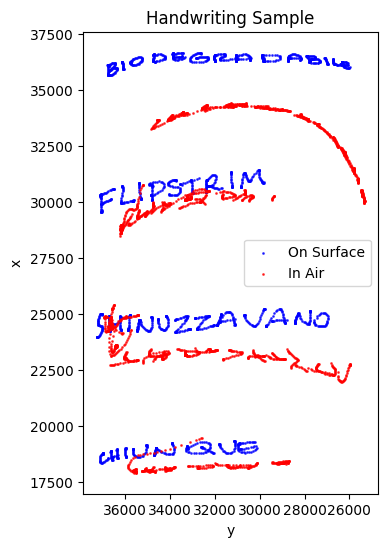

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def visualize_handwriting_from_file(file_path):
    # Check if the file exists
    if not os.path.isfile(file_path):
        print(f"File not found: {file_path}")
        return
    
    try:
        # Assuming the file is whitespace-separated and has no header
        df = pd.read_csv(file_path, delim_whitespace=True, header=None)
        df.columns = ['x', 'y', 'timestamp', 'pen_status', 'pressure', 'azimuth', 'altitude']
        
        # Separate strokes based on pen status
        on_surface = df[df['pen_status'] == 1]
        in_air = df[df['pen_status'] == 0]

        # Create the plot
        plt.figure(figsize=(6, 6))
        plt.scatter(on_surface['y'], on_surface['x'], c='b', s=1, alpha=0.7, label='On Surface')
        plt.scatter(in_air['y'], in_air['x'], c='r', s=1, alpha=0.7, label='In Air')
        plt.title(f'Handwriting Sample')
        plt.xlabel('y')
        plt.ylabel('x')
        plt.gca().invert_xaxis()
        plt.gca().set_aspect('equal')
        plt.legend()
        
        # Show the plot
        plt.show()
    
    except Exception as e:
        print(f"Could not process file {file_path}: {e}")

# Usage Example:
# Specify the path to a single handwriting file
file_path = 'all_augmented_data/synthetic_u00007s00001_hw00003.svc'  # Change this to your actual file path
visualize_handwriting_from_file(file_path)
